## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly as py
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
py.offline.init_notebook_mode(connected = True)


import os



## Data Exploration

In [3]:
data=pd.read_csv('E:\customer_data.csv')

In [4]:
data.shape

(1000, 8)

In [5]:
data.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [6]:
data.describe()

,age,income,purchase_frequency,spending
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.754000,59277.852000,0.554600,9613.296835
std,13.778582,23258.377128,0.284675,5484.707210
min,18.000000,20031.000000,0.100000,611.985000
25%,30.000000,38825.500000,0.300000,5020.425000
50%,42.000000,58972.000000,0.600000,9430.395000
75%,54.000000,79114.000000,0.800000,13645.507500
max,65.000000,99780.000000,1.000000,25546.500000


In [7]:
data.isnull().sum()

name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64

Vì không có cột dữ liệu nào trong bộ dữ liệu bị NULL nên không cần thực hiện bước data cleaning

In [8]:
## Data Visualisation

## Data Visualisation

In [9]:
plt.style.use('fivethirtyeight')

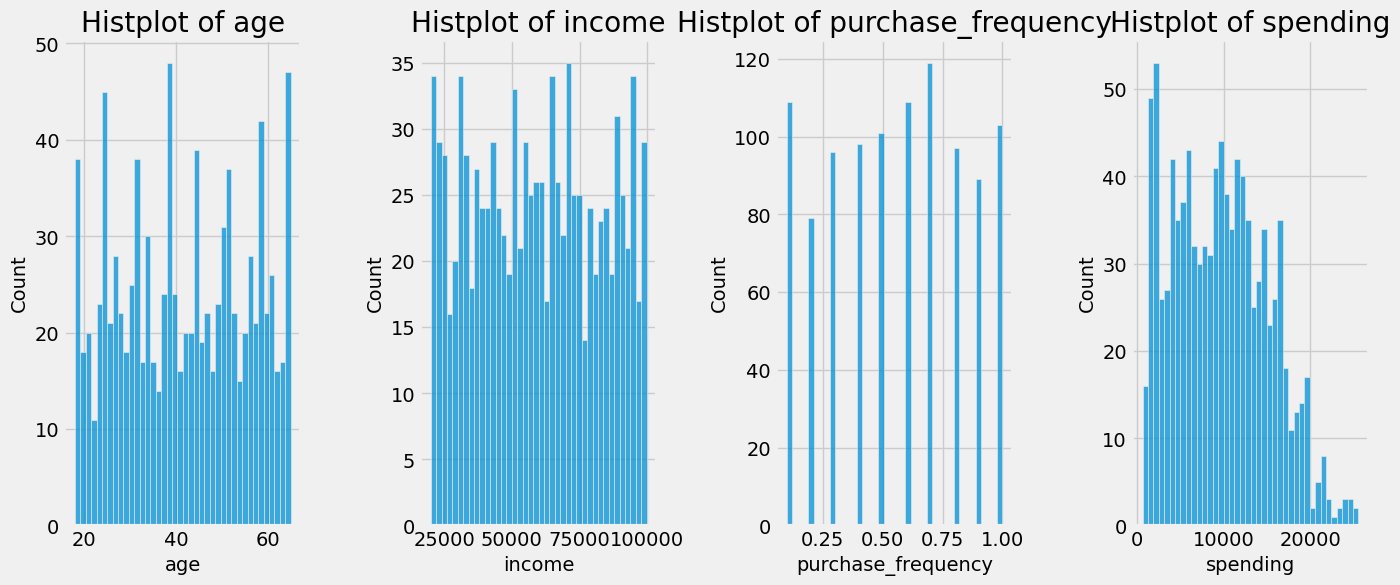

In [10]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['age' , 'income' , 'purchase_frequency', 'spending']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =5, wspace = 0.5)
    sns.histplot(data[x] , bins = 40)
    plt.title('Histplot of {}'.format(x))
plt.show()

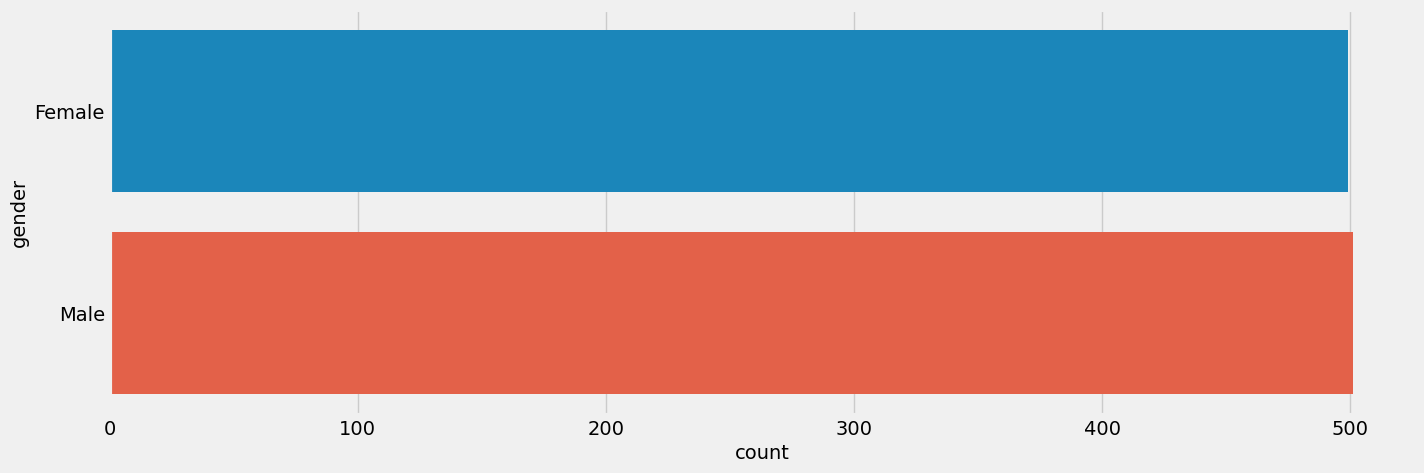

In [11]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'gender' , data = data)
plt.show()

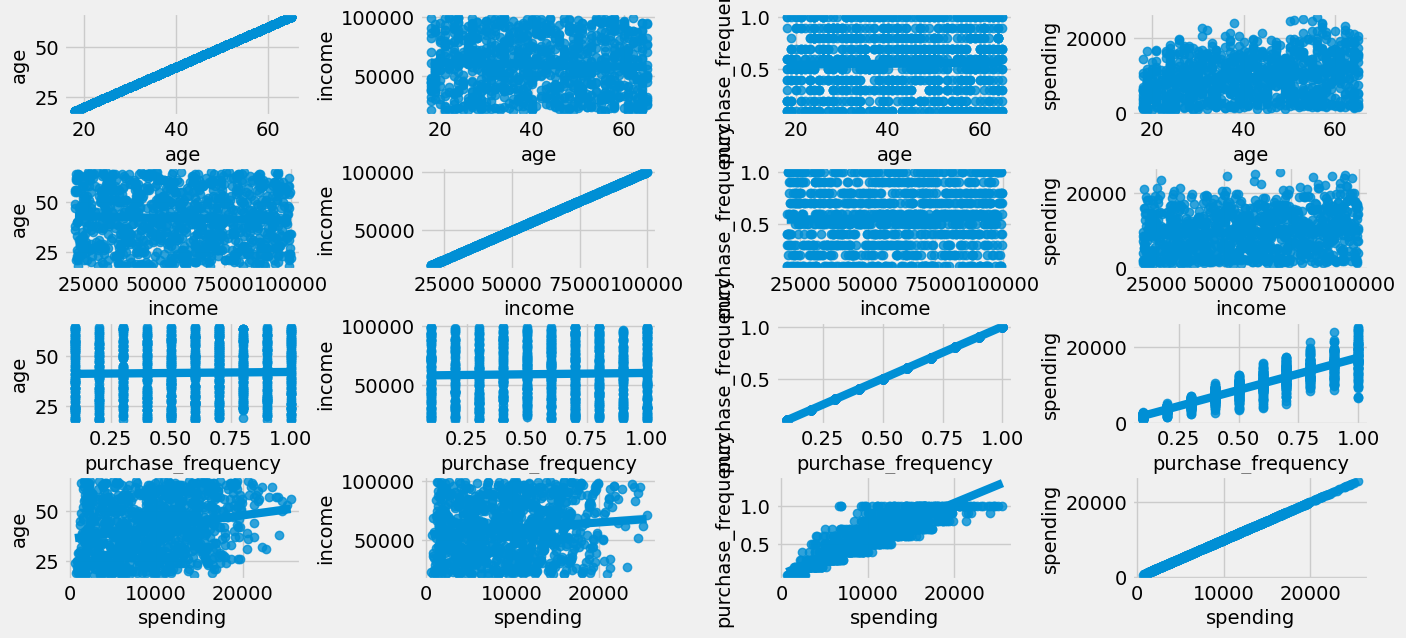

In [12]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['age' , 'income' , 'purchase_frequency', 'spending']:
    for y in ['age' , 'income' , 'purchase_frequency', 'spending']:
        n += 1
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

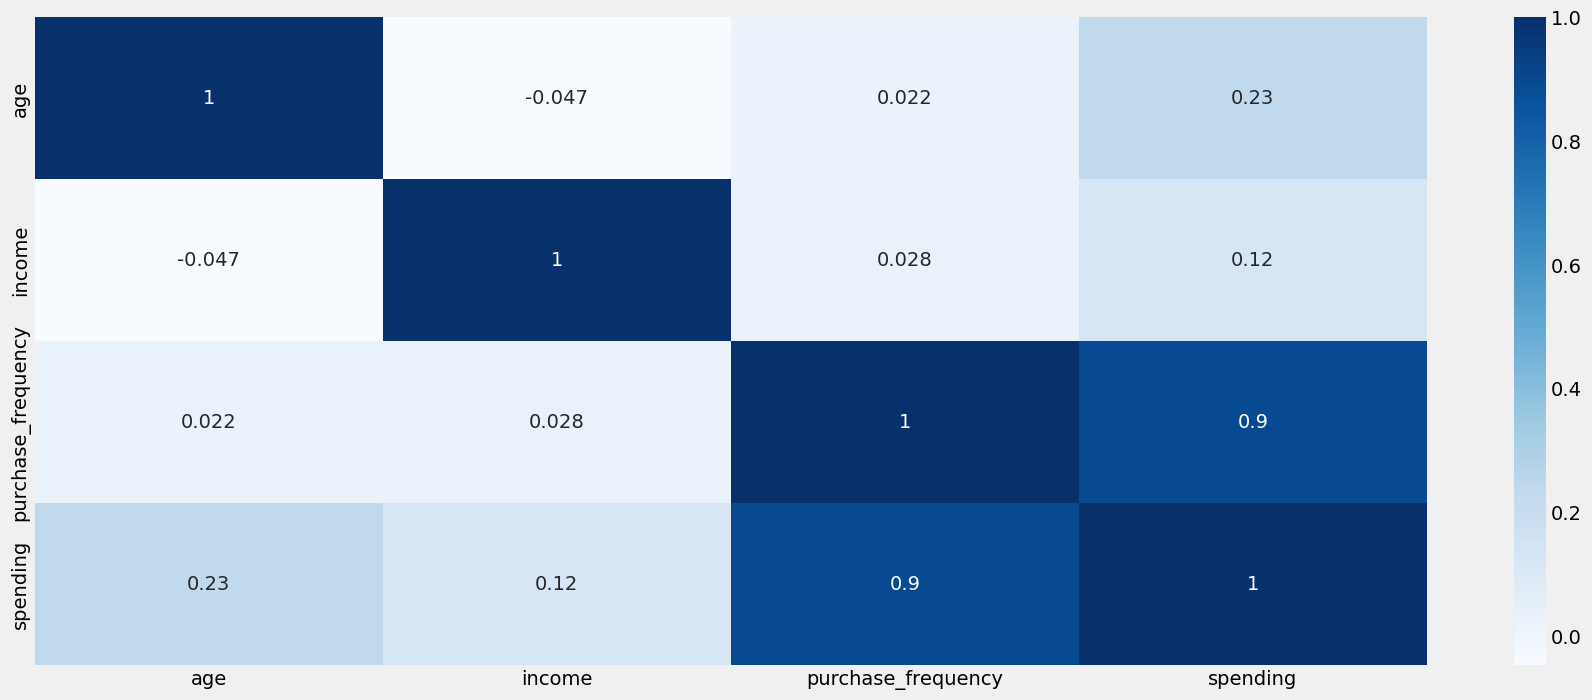

In [13]:
## Tạo biểu đồ thể hiện mức độ tương quan giữa các thuộc tính
plt.figure(figsize = (20,8))
sns.heatmap(data.corr(numeric_only = True), annot = True, cmap = plt.cm.Blues)
plt.show()

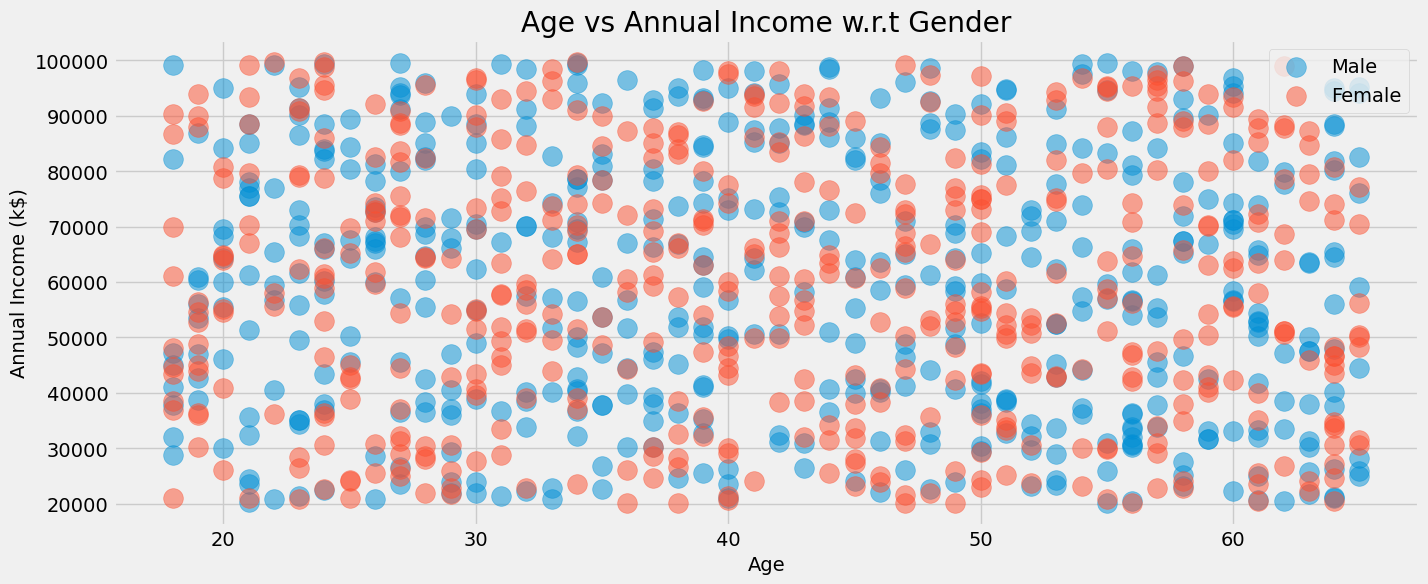

In [117]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'age' , y = 'income' , data = data[data['gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

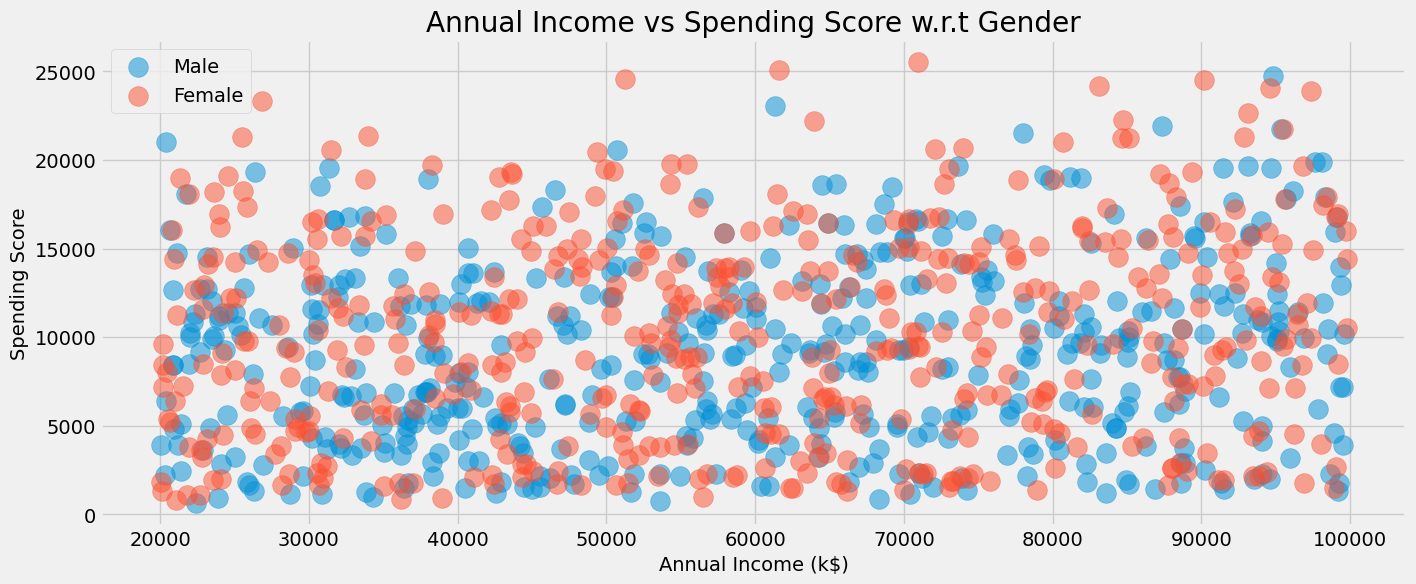

In [118]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'income',y = 'spending' ,
                data = data[data['gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

## K-Means Clustering

In [119]:
data_1=data[['age' , 'income' , 'purchase_frequency', 'spending']]

In [83]:
data_1.describe()

,age,income,purchase_frequency,spending
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.754000,59277.852000,0.554600,9613.296835
std,13.778582,23258.377128,0.284675,5484.707210
min,18.000000,20031.000000,0.100000,611.985000
25%,30.000000,38825.500000,0.300000,5020.425000
50%,42.000000,58972.000000,0.600000,9430.395000
75%,54.000000,79114.000000,0.800000,13645.507500
max,65.000000,99780.000000,1.000000,25546.500000


In [84]:
data_1.corr()

,age,income,purchase_frequency,spending
age,1.000000,-0.047190,0.021751,0.234201
income,-0.047190,1.000000,0.028187,0.122851
purchase_frequency,0.021751,0.028187,1.000000,0.895161
spending,0.234201,0.122851,0.895161,1.000000


Như chúng ta có thể thấy, chúng ta không có các đặc trưng có mối tương quan mạnh, vì vậy chúng ta có thể sử dụng các thuật toán tiêu chuẩn kèm theo việc giảm chiều dữ liệu.

Trước khi đưa dữ liệu vào K-means, ta cần chuẩn hoá dữ liệu trước

In [85]:
X=data_1.values
#print(x)
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [86]:
from sklearn.metrics import silhouette_samples, silhouette_score
x = list(range(2, 12))
y_std = []
for n_clusters in x:
    print("n_clusters =", n_clusters)
    
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10,max_iter=300)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    y_std.append(silhouette_avg)
    print("The average silhouette_score is :", silhouette_avg, "with Std Scaling")

n_clusters = 2
The average silhouette_score is : 0.30595610164556386 with Std Scaling
n_clusters = 3
The average silhouette_score is : 0.26537719758612477 with Std Scaling
n_clusters = 4
The average silhouette_score is : 0.25895961053289607 with Std Scaling
n_clusters = 5
The average silhouette_score is : 0.25738325470582213 with Std Scaling
n_clusters = 6
The average silhouette_score is : 0.26706361402172196 with Std Scaling
n_clusters = 7
The average silhouette_score is : 0.2755719614948065 with Std Scaling
n_clusters = 8
The average silhouette_score is : 0.26825812050723175 with Std Scaling
n_clusters = 9
The average silhouette_score is : 0.267381547928115 with Std Scaling
n_clusters = 10
The average silhouette_score is : 0.26303871545172886 with Std Scaling
n_clusters = 11
The average silhouette_score is : 0.2576990778670228 with Std Scaling


Như chúng ta có thể thấy, điểm Silhouette cao nhất là khi số lượng cụm bằng 2, vì vậy chúng ta sẽ thử với 2 cụm và kiểm tra.

In [87]:
kmeans=KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') 
kmeans.fit(X)
clusters=kmeans.predict(X)
#print(clusters)

## Interpretting and Visualizing the clusters

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
data_1['clusters']=clusters
data_1.head()

,age,income,purchase_frequency,spending,clusters
0,42,53936,0.9,13227.120,0
1,49,82468,0.6,12674.040,0
2,55,56941,0.3,5354.115,1
3,24,60651,0.2,2606.510,1
4,64,81884,0.9,18984.780,0


In [90]:
trace1 = go.Scatter3d(
    x= data_1['income'],
    y= data_1['purchase_frequency'],
    z= data_1['spending'],
    mode='markers',
     marker=dict(
        color = data_1['clusters'], 
        size= 20,
        line=dict(
            color= data_1['clusters'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Annual Income'),
            yaxis = dict(title  = 'Purchase Frequency'),
            zaxis = dict(title  = 'Spending Score'),   
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

Visualizing clusters in 2D using T-SNE

Text(0.5, 1.0, 'Visualization of the clustering with TSNE')

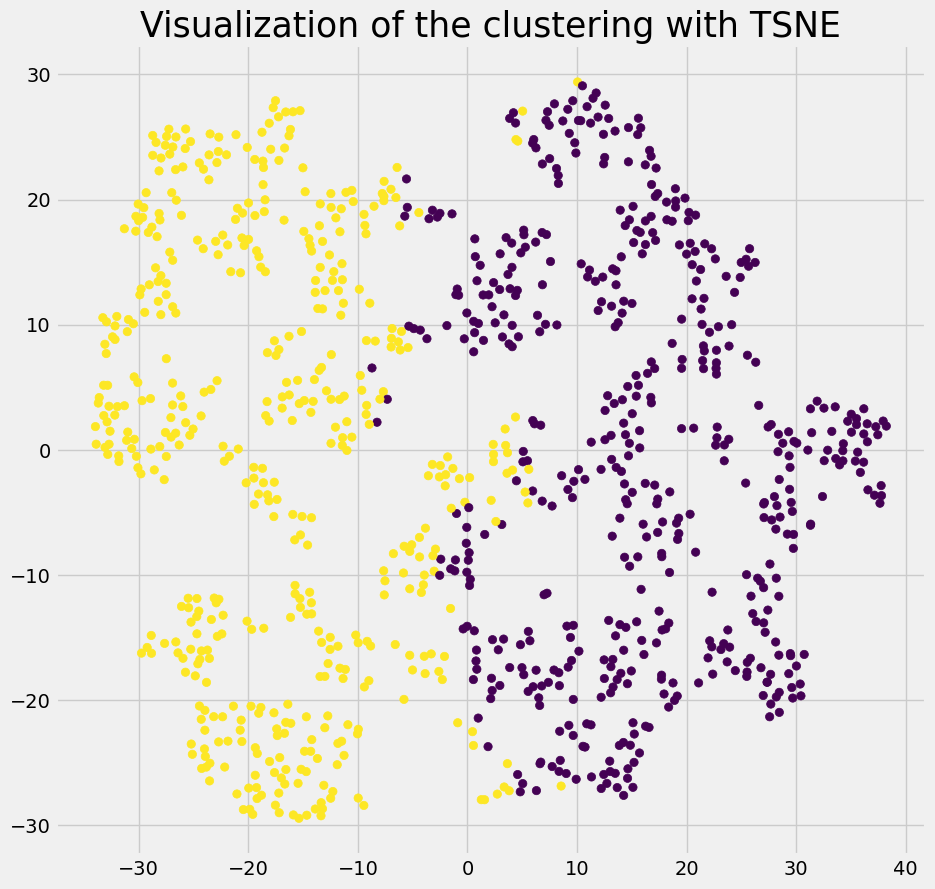

In [91]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(X)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="25")

## Interpretting the cluster using the cluster centriods.

### Cluster 0

In [92]:
cluster_0=data_1[data_1['clusters']==0]

In [93]:
cluster_0.describe()

,age,income,purchase_frequency,spending,clusters
count,512.000000,512.000000,512.000000,512.000000,512.0
mean,44.275391,61295.781250,0.785352,14016.613555,0.0
std,13.238159,23705.886656,0.155021,3576.555377,0.0
min,18.000000,20206.000000,0.400000,6619.100000,0.0
25%,33.000000,40986.500000,0.700000,11276.783750,0.0
50%,46.000000,61852.500000,0.800000,13432.035000,0.0
75%,56.000000,82086.750000,0.900000,16406.327500,0.0
max,65.000000,99780.000000,1.000000,25546.500000,0.0


Bằng việc so sánh giá trị trung bình của nhóm(cụm), ta có thể thấy rằng: Khách hàng với độ tuổi trung bình cao hơn, với thu nhập cao hơn thì sẽ có tần suất mua hàng và chi tiêu nhiều hơn.

### Cluster 1

In [94]:
cluster_1=data_1[data_1['clusters']==1]
cluster_1.describe()

,age,income,purchase_frequency,spending,clusters
count,488.000000,488.000000,488.000000,488.000000,488.0
mean,39.108607,57160.680328,0.312500,4993.423555,1.0
std,13.851459,22610.561629,0.162209,2552.360303,0.0
min,18.000000,20031.000000,0.100000,611.985000,1.0
25%,27.000000,38246.500000,0.200000,2631.586250,1.0
50%,38.000000,56341.500000,0.300000,4914.747500,1.0
75%,51.000000,74709.000000,0.400000,6928.788750,1.0
max,65.000000,99532.000000,0.700000,10961.875000,1.0


# Classifying the clusters using Support Vector Machine

In [95]:
X_1 = data_1.drop(columns=['clusters']) 
y = data_1['clusters'].values

In [96]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X_1)

Making a training and testing Split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 0, stratify=y)

Checking with Dummy Classifier First

In [98]:
from sklearn.dummy import DummyClassifier

In [99]:
dummy_biased = DummyClassifier(random_state=0)

dummy_biased.fit(X_train, y_train)

DummyClassifier(random_state=0)

In [100]:
print("Baseline accuracy", (dummy_biased.score(X_test, y_test))*100)

Baseline accuracy 51.0


Checking the Accuracy of Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
lr = LogisticRegression(multi_class='auto')
lr.fit(X_train, y_train)
print("LogisticRegression_classifier accuracy:", (lr.score(X_test, y_test))*100)

LogisticRegression_classifier accuracy: 99.5


Using Linear Support Vector Machine

In [103]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, y_train)
print("LinearSVC accuracy:", (svc.score(X_test, y_test))*100)

LinearSVC accuracy: 99.0


Checking if using kernel trick the accuracy could be improved.

In [104]:
svc_rbf=SVC(kernel='rbf',gamma='auto')
svc_rbf.fit(X_train,y_train)
print("svc_rbf accuracy:", (svc_rbf.score(X_test, y_test))*100)


svc_rbf accuracy: 97.5
